In [16]:
import stepper as step
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [11]:
X_monte_1 = np.load('X_monte_1.npy')
Y_monte_1 = np.load('Y_monte_1.npy')
fail_times_1 = np.load('fail_times_1.npy')

In [12]:
# load samples
X_total = np.concatenate([np.load(f'X_monte_{i}.npy') for i in range(3,7)])
X_total = np.concatenate([X_total,X_monte_1])
fail_times_total = np.concatenate([np.load(f'fail_times_{i}.npy') for i in range(3,7)])
fail_times_total = np.concatenate([fail_times_total,fail_times_1])

In [13]:
fail_times_total[fail_times_total==0.]=np.inf

In [14]:
samples = np.array(step.get_samples_fail(X_total, fail_times_total,10))
len(samples)

316

In [19]:
# test execution time
step.time_execution(transition_list,200,step.OBS_NAME,1000)

(527.2193267345428,
 0.21674442291259766,
 525.8200540542603,
 0.24790525436401367,
 0.14022278785705566)

In [ ]:
plt.plot()

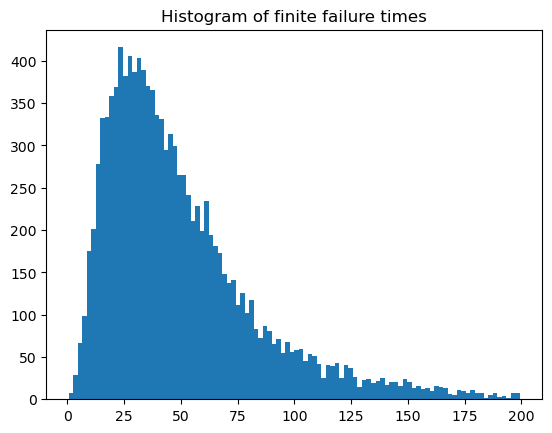

In [6]:
plt.hist(fail_times_total[fail_times_total!=np.inf],bins = 100)
plt.title("Histogram of finite failure times")
plt.show()

In [11]:
X_total[:,0]

array([1603.78349605,  496.22910983,  791.78599472, ...,   55.85374435,
        124.81400959,  266.08476112])

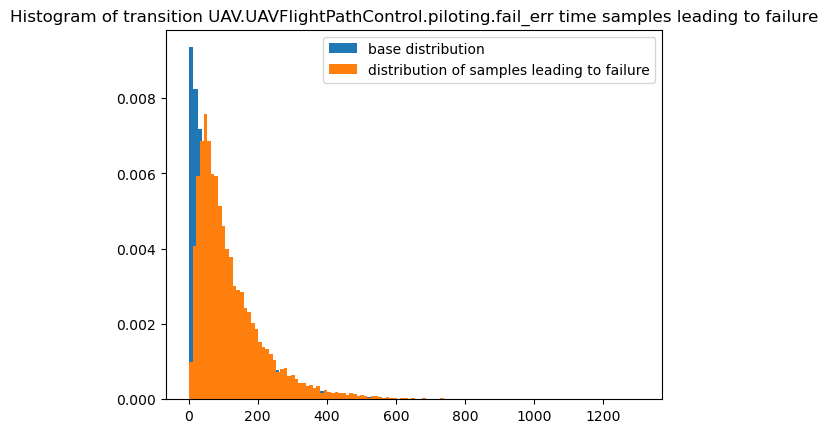

In [53]:
x_index = 11
plt.hist(X_total[:,x_index],density=True,bins = 100,label="base distribution")
plt.hist(X_total[:,x_index][fail_times_total!=np.inf],density = True,bins = 100,label="distribution of samples leading to failure")

plt.title(f"Histogram of transition {transition_list[x_index][1]} time samples leading to failure")
plt.legend()
plt.show()

In [46]:
len(X_total)

500000

In [8]:
# p_T at T=10 estimated by Monte Carlo with 500 000 samples
p_monte = len(samples)/500000
print(p_monte)

0.000632


In [120]:
# coefficient of variance estimation of the Monte Carlo estimation
np.sqrt((1-p_monte)/(p_monte*500000))

0.05623661584790924

In [7]:
transition_list = step.get_transitions()

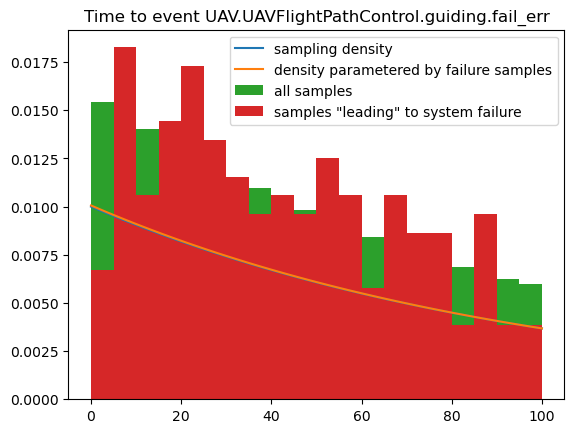

exponential parameter: 0.01
mean of the samples leading to failure: 99.4097013757494


In [88]:
x_index = 7
x_space = np.linspace(0,100,100)
lbd = transition_list[x_index][2]
c = 0.2
f = lambda x,param: param*np.exp(-param*x)
plt.plot(x_space,f(x_space,lbd),label="sampling density")
plt.plot(x_space,f(x_space,1/np.mean(samples[:,x_index])),label="density parametered by failure samples")
plt.hist(X_total[:,x_index],density=True,label="all samples",bins=20,range=(0,100))
plt.hist(samples[:,x_index],density=True,label="samples \"leading\" to system failure",bins=20,range=(0,100))
plt.title(f"Time to event {transition_list[x_index][1]}")
plt.legend()
plt.show()

print(f"exponential parameter: {lbd}\nmean of the samples leading to failure: {np.mean(samples[:,x_index])}")
#print(stats.kstest(samples[:,x_index],stats.expon(scale = 1/lbd).cdf))

In [14]:
transition_parameter_vs_mean = np.zeros(len(transition_list))
for x_index in range(len(transition_list)):
    transition_parameter_vs_mean[x_index] = transition_list[x_index][2]*np.mean(samples[:,x_index])
ordered_transition = np.argsort(transition_parameter_vs_mean)
# select only ten variables
selected_transition_indices = np.concatenate((ordered_transition[:8],ordered_transition[-2:]))
for x_index in ordered_transition:
    print(f"{transition_list[x_index][1]} ({x_index}): {transition_parameter_vs_mean[x_index]}")

UAV.UAVMonitoring.PropulsionLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (19): 0.4915270773698777
COM.UpLink.Link.fail_err (3): 0.5191382514090896
COM.DownLink.Link.fail_err (1): 0.5707293163780347
UAV.UAVFlightPathControl.propulsion.fail_err (13): 0.6258290668009502
UAV.UAVParametersAcquisition.IMU2.fail_err (29): 0.7939263196560526
UAV.UAVMonitoring.TrajectoryLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (21): 0.8194614211657496
UAV.UAVMonitoring.GuidingDataLostDetection.EquipmentLossDetectionAlarm.stuck_on_true (14): 0.8387864194082257
UAV.UAVParametersAcquisition.GPS1.fail_err (23): 0.8813339291134387
UAV.UAVFlightPathControl.actuator.fail_loss (4): 0.891090765663033
UAV.UAVFlightPathControl.piloting.fail_err (11): 0.9029584262186152
UAV.UAVMonitoring.PilotingDataLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (17): 0.9040073526509396
UAV.UAVFlightPathControl.propulsion.fail_loss (12): 0.9102583505615607
COM.DownLink.Link.fail_loss (0): 0.91448329999

In [3]:
# sample along exponential density with the mean param
draw_g = [(lambda x_index = tr_index : np.random.default_rng().exponential(scale=np.mean(samples[:,x_index]))) for tr_index in range(len(transition_list))]

In [31]:
X_IS,Y_IS,fail_times_IS = step.sample_IS(draw_g,transition_list,200,step.OBS_NAME,10000)

In [32]:
samples_IS = np.array(step.get_samples_fail(X_IS, fail_times_IS,10))
len(samples_IS)

36

In [33]:
g = [(lambda x, x_index = tr_index: np.exp(-x/np.mean(samples[:,x_index]))/np.mean(samples[:,x_index]))  for tr_index in range(len(transition_list))]

In [35]:
p_f,cv = step.compute_pf_cv(g,transition_list,X_IS,fail_times_IS,10)

In [37]:
print(f"probability estimation with IS with sampling density parametrized with means of Monte-Carlo: {p_f}")
print(f"cv estimation with IS with sampling density parametrized with means of Monte-Carlo: {cv}")

probability estimation with IS with sampling density parametrized with means of Monte-Carlo: 0.0007741730505371195
cv estimation with IS with sampling density parametrized with means of Monte-Carlo: 0.23782155475469666


In [4]:
lbd_0 = [1/np.mean(samples[:,x_index]) for x_index in range(len(transition_list))]


NameError: name 'samples' is not defined

In [74]:
theta_0 = [np.mean(samples[:,x_index]) for x_index in range(len(transition_list))]

In [7]:
def AIS_CE(lbd_0,transition_list,obs_name,T,max_time,N,alpha,transition_index_list):
    """
    AIS_CE for p
    """
    n_tr = len(transition_list)
    quant_index = int(np.ceil(alpha*N))
    lbd = lbd_0.copy()
    # temporary lbd
    lbd_temp = lbd_0.copy()
    # current threshold time
    t_m = max_time
    n_rep = 0
    while t_m>T or p_T>1:
        print(f"t_m = {t_m}")
        # sampling density
        draw_f = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd]
        X_IS,_,fail_times_IS  = step.sample_IS(draw_f,transition_list,max_time,obs_name,N)
        # quantile of level alpha
        #print(fail_times_IS)
        #print(quant_index)
        sorted_fail_times_IS = sorted(fail_times_IS)
        t_alpha = sorted_fail_times_IS[quant_index]
        t_m = max(t_alpha,T)
        # if t_alpha is infinite, take all the non infinite values
        if t_m == np.inf:
            print("less samples leading to failure than the requested quantile")
            max_index = quant_index
            while max_index >= 0 and sorted_fail_times_IS[max_index] == np.inf:
                max_index-=1
            if max_index == 0:
                raise Exception("None of the drawn samples lead to the failure event")
            t_m = sorted_fail_times_IS[max_index]
        # ratio between f_x|lbd_0 and f_x|lbd
        W = lambda x,lbd_0_w,lbd_w : np.prod([(lbd_0_w[tr_index]/lbd_w[tr_index]) for tr_index in transition_index_list])*np.exp(np.sum([-x[tr_index]*((lbd_0_w[tr_index]-lbd_w[tr_index])) for tr_index in transition_index_list]))
        #W = lambda x,lbd_0,lbd : np.prod([(lbd[tr_index]/lbd_0[tr_index]) for tr_index in range(n_tr)])*np.exp(np.sum([-x[tr_index]*((lbd[tr_index]-lbd_0[tr_index])/(lbd[tr_index]*lbd_0[tr_index])) for tr_index in range(n_tr)]))
        for tr_index in transition_index_list:
            lbd_num = 0
            lbd_denom = 0
            for sample_index in range(N):
                if fail_times_IS[sample_index]<=t_m :
                    W_i = W(X_IS[sample_index],lbd_0,lbd)
                    lbd_num+=W_i
                    lbd_denom+=W_i*X_IS[sample_index][tr_index]
            lbd_temp[tr_index] = lbd_num/lbd_denom
        lbd = lbd_temp.copy()
        # estimate probability and cv
        W_array = np.zeros(N)
        for sample_index in range(N):
            if fail_times_IS[sample_index]<=T :
                W_array[sample_index]=W(X_IS[sample_index],lbd_0,lbd)
        p_T = np.mean(W_array)
        cv = np.sqrt(np.var(W_array))/(np.sqrt(N)*p_T)
        print(f"current probability estimation: {p_T}")
        print(f"current cv estimation: {cv}")
        n_rep+=1
    # estimate probability and cv
    W_array = np.zeros(N)
    for sample_index in range(N):
        if fail_times_IS[sample_index]<=T :
            W_array[sample_index]=W(X_IS[sample_index],lbd_0,lbd)
    p_T = np.mean(W_array)
    if p_T>1:
        raise Exception("Final estimated probability is greater than 1")
    cv = np.sqrt(np.var(W_array))/(np.sqrt(N)*p_T)
        
    return p_T,cv,lbd


In [32]:
p_f,cv = step.compute_pf_cv(g,transition_list,X_IS,fail_times_IS,10,1000)

False

In [5]:
lbd_1 = [transition_list[tr_index][2] for tr_index in range(len(transition_list))]

In [93]:
lbd_0-lbd

array([-0.08540864, -0.44543561, -0.13711702, -0.02724117, -0.16089769,
       -0.12009918, -0.0480586 , -0.05135355, -0.06576856, -0.04295672,
       -0.1091725 , -0.03581147, -0.02737279, -1.98405529, -0.17117284,
       -0.05360914, -0.16263148, -0.03262368, -0.0278677 , -0.1073898 ,
       -0.01847875, -0.14230657, -0.0924432 , -0.10531205, -0.15384046,
       -0.16490706, -0.41939707, -0.01395935, -1.34682459, -0.19237761,
       -0.22276389, -3.47819802, -0.16183092, -0.36986889, -0.11006216,
       -0.17547932, -0.03775409, -0.71290038])

In [107]:
transition_list[26]

[26, 'UAV.UAVParametersAcquisition.IMU1.fail_loss', 0.001]

In [ ]:
[(transition_list[tr][1],lbd_1[tr]-lbd[tr]) for tr in np.argsort(lbd_1-lbd)]

In [14]:
p_monte

0.000632

In [38]:
print(f"probability estimation with AIS-CE starting with default lbd: {p_fA}")
print(f"cv estimation with IS with AIS-CE starting with default lbd: {cvA}")

probability estimation with AIS-CE starting with default lbd: 0.0004326265171213852
cv estimation with IS with AIS-CE starting with default lbd: 0.6697416553134752


In [16]:
ordered_transition_lbd = np.argsort(lbd)

for x_index in ordered_transition_lbd:
    print(f"{transition_list[x_index][1]} ({x_index}): {lbd[x_index]}")

UAV.UAVFlightPathControl.propulsion.fail_loss (12): 0.0005594226855263632
UAV.UAVParametersAcquisition.alti2.fail_loss (32): 0.0007420933038568256
UAV.UAVFlightPathControl.guiding.fail_loss (6): 0.0007945267162978278
UAV.UAVParametersAcquisition.IMU2.fail_loss (28): 0.0008433443866435731
UAV.UAVParametersAcquisition.baro2.fail_loss (36): 0.000915601094610914
UAV.UAVFlightPathControl.actuator.fail_loss (4): 0.0009203426093124357
UAV.UAVParametersAcquisition.baro1.fail_loss (34): 0.001024135702183515
UAV.UAVParametersAcquisition.GPS1.fail_loss (22): 0.00119891149370098
UAV.UAVParametersAcquisition.IMU1.fail_loss (26): 0.0012062173075908685
COM.DownLink.Link.fail_loss (0): 0.001206555446389139
UAV.UAVParametersAcquisition.alti1.fail_loss (30): 0.0012404851059393473
UAV.UAVFlightPathControl.navigation.fail_loss (8): 0.0014520175040224224
UAV.UAVFlightPathControl.piloting.fail_loss (10): 0.0014639567206150372
UAV.UAVParametersAcquisition.GPS2.fail_loss (24): 0.001653548078638289
COM.UpLink.

In [205]:
cvA

0.6254209892277611

In [230]:
p_ft1,cvt1,lbdt1 = AIS_CE(lbd_1,transition_list,step.OBS_NAME,1,200,2000,0.05,[i for i in range(len(transition_list))])

t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.0
current cv estimation: nan
t_m = 155.5882596631264


C:\Users\jo.mboko\AppData\Local\Temp\ipykernel_12704\2454438467.py:52: RuntimeWarning: invalid value encountered in scalar divide
  cv = np.sqrt(np.var(W_array))/(np.sqrt(N)*p_T)


current probability estimation: 0.0
current cv estimation: nan
t_m = 55.34074661568694
current probability estimation: 0.0
current cv estimation: nan
t_m = 39.7753449285942
current probability estimation: 0.0
current cv estimation: nan
t_m = 28.84773866066497
current probability estimation: 0.0
current cv estimation: nan
t_m = 29.121529617148752
current probability estimation: 0.0
current cv estimation: nan
t_m = 10.104698330211022
current probability estimation: 0.0
current cv estimation: nan
t_m = 11.85178110637807
current probability estimation: 4.1442142870201284e-11
current cv estimation: 0.999749968742185
t_m = 6.3262463798855
current probability estimation: 0.00011789371168200603
current cv estimation: 0.9997497313098249
t_m = 3.870884865104823
current probability estimation: 3.0137742832077084e-08
current cv estimation: 0.9868507522016099
t_m = 2.7276954780015115
current probability estimation: 305.61234043994614
current cv estimation: 0.9978605499953553
t_m = 1.327766423348756

In [6]:
#np.save("lbd_AIS-CE1.npy",lbd)
lbd = np.load("lbd_AIS-CE1.npy")

In [9]:
p_fA,cvA,lbd = AIS_CE(lbd_1,transition_list,step.OBS_NAME,10,200,2000,0.05,[i for i in range(len(transition_list))])


t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.0
current cv estimation: nan
t_m = 138.99444390560686


C:\Users\jo.mboko\AppData\Local\Temp\ipykernel_14440\3436779509.py:52: RuntimeWarning: invalid value encountered in scalar divide
  cv = np.sqrt(np.var(W_array))/(np.sqrt(N)*p_T)


current probability estimation: 0.0017501524572954314
current cv estimation: 0.6813402294393609
t_m = 66.24503995686743
current probability estimation: 0.0002782290836523025
current cv estimation: 0.5465622591933941
t_m = 42.57760336127381
current probability estimation: 0.0002846189367222843
current cv estimation: 0.665017518734127
t_m = 34.9997955024042
current probability estimation: 0.016624895663915177
current cv estimation: 0.9210403666685991
t_m = 30.350765765243466
current probability estimation: 0.007880064274213684
current cv estimation: 0.7165590448296323
t_m = 32.003924688674815
current probability estimation: 0.0008483523826209977
current cv estimation: 0.5580834304203361
t_m = 24.112324838546016
current probability estimation: 0.0008600619306160492
current cv estimation: 0.46631130255557995
t_m = 23.511714017433402
current probability estimation: 0.07055012032174383
current cv estimation: 0.6970871009458794
t_m = 18.976001014863996
current probability estimation: 1.477397

In [25]:
p_fA_0,cvA_0,lbd_bis = AIS_CE(lbd_0,transition_list,step.OBS_NAME,10,200,2000,0.2,[i for i in range(len(transition_list))])


t_m = 200
[3.6818917585751194, 7.353481991671704, 8.220381315904817, 11.428641948409235, 11.860270191810306, 12.154041796229018, 12.327927424034307, 12.593600872654546, 12.767030562843932, 13.083584224209332, 13.188352261179155, 13.207620832877836, 13.778137391853985, 15.39555019197193, 15.448045116066261, 18.281849785393895, 18.583731914008393, 20.197392441001657, 20.348600792053237, 20.506178130785443, 20.775888785485893, 20.862961319153232, 21.585566355692187, 22.16846078591172, 22.316674582967597, 22.881009760199778, 23.0977349599546, 23.461967246113325, 23.82150018830005, 24.624806487620244, 25.06222378215871, 25.394526948777564, 25.74139565284933, 25.98293484406991, 26.95450598239531, 27.484400345061808, 29.854748115583668, 30.494780077753166, 30.892589139232953, 31.841240649732132, 32.2683040678936, 33.19202777949016, 33.76898257192836, 34.20146504991357, 36.46580836152961, 37.874307325058304, 38.41266145797497, 39.39558832899582, 40.33228252415329, 41.5630630669637, 42.20951506

In [207]:
p_fA

0.0004525742946819217

In [8]:
g_lbd = [(lambda x: np.exp(-x*lbd[x_index])*lbd[x_index])  for x_index in range(len(transition_list))]

In [13]:
"""
# Monte carlo
X_monte,Y_monte,fail_times = step.Monte_Carlo(transition_list,MAX_TIME,step.OBS_NAME,N_RUN)
np.save("X_monte_1.npy",X_monte)
np.save("Y_monte_1.npy",Y_monte)
np.save("fail_times_1.npy",fail_times)
p_f_monte = np.sum(Y_monte)/len(Y_monte)
print(f"failure proba at t={MAX_TIME}: {p_f_monte}")
print(f"CV estimation with {N_RUN}: {np.sqrt((1-p_f_monte)/(p_f_monte*N_RUN))}")
"""

In [15]:
X_monte,Y_monte = step.Monte_Carlo(transition_list,MAX_TIME,step.OBS_NAME,N_RUN//10)
p_f_monte = np.sum(Y_monte)/len(Y_monte)
print(f"failure proba at t={MAX_TIME}: {p_f_monte}")
print(f"CV estimation with {N_RUN//10}: {np.sqrt((1-p_f_monte)/(p_f_monte*(N_RUN/10)))}")

failure proba at t=10: 0.001
CV estimation with 1000: 0.999499874937461


In [16]:
#IS 
X_is,Y_is,p_f,cv = step.simple_IS(transition_list,MAX_TIME,0.2,step.OBS_NAME,N_RUN//10)
print(f"failure proba at t={MAX_TIME}: {p_f}")
print(f"CV estimation with {N_RUN//10}: {cv}")

failure proba at t=10: 2.6738583351938427e-05
CV estimation with 1000: 0.5036086070928523


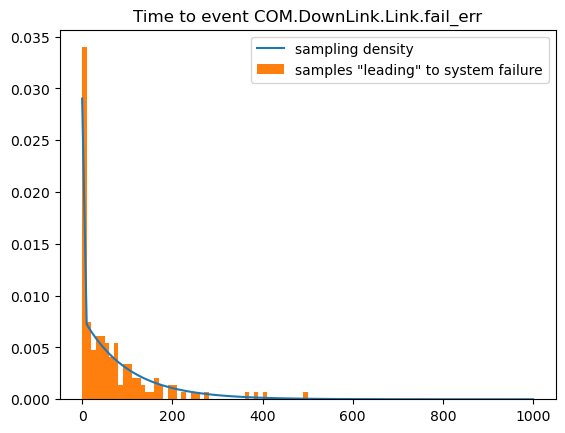

KstestResult(statistic=0.09812314609290355, pvalue=0.11024687249879428, statistic_location=4.207826632401432, statistic_sign=1)


In [39]:
x_index = 1
x_space = np.linspace(0,100*MAX_TIME,100)
lbd = transition_list[x_index][2]
c = 0.2
g = lambda x: (x<=MAX_TIME)*(1+c*(np.exp(-lbd*MAX_TIME)/(1-np.exp(-lbd*MAX_TIME))))*(lbd*np.exp(-lbd*x))+(x>MAX_TIME)*(1-c)*(lbd*np.exp(-lbd*x))
plt.plot(x_space,g(x_space),label="sampling density")
plt.hist(X_is[:,x_index][Y_is==1.],density=True,label="samples \"leading\" to system failure",bins=50)
plt.title(f"Time to event {transition_list[x_index][1]}")
plt.legend()
plt.show()

# test ks
# cdf corresponding to g
G = lambda x: (x<=MAX_TIME)*(1+c*(np.exp(-lbd*MAX_TIME)/(1-np.exp(-lbd*MAX_TIME))))*(1-np.exp(-lbd*x))+(x>MAX_TIME)*((1+c*(np.exp(-lbd*MAX_TIME)/(1-np.exp(-lbd*MAX_TIME))))*(1-np.exp(-lbd*MAX_TIME))+(1-c)*(np.exp(-lbd*MAX_TIME)-np.exp(-lbd*x)))

print(stats.kstest(X_is[:,x_index][Y_is==1.],G))

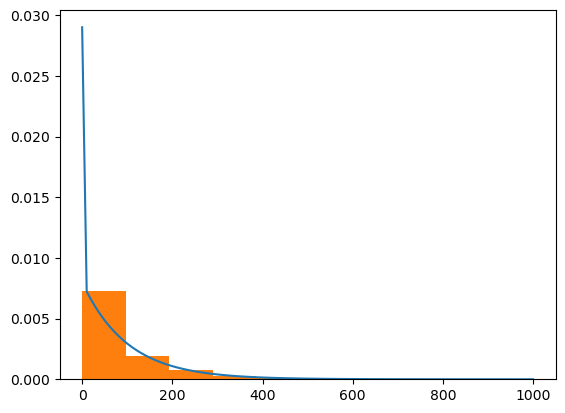

KstestResult(statistic=0.011449838723396999, pvalue=0.14415658490953864, statistic_location=65.21255930235483, statistic_sign=1)


In [40]:
plt.plot(x_space,g(x_space))
plt.hist(X_is[:,x_index],density=True,bins=10)
plt.show()
print(stats.kstest(X_is[:,x_index],G))

In [48]:
pvalue_diffs=[stats.kstest(X_is[:,x_index][Y_is==1.],G)[1]-stats.kstest(X_is[:,x_index],G)[1] for x_index in range(len(transition_list))]
    

index 0 p-value diff: 1.0491548952146876e-24
index 1 p-value diff: -0.033909712410744364
index 2 p-value diff: 1.0786032853867776e-23
index 3 p-value diff: -0.01939899247723522
index 4 p-value diff: 1.6457496156256317e-51
index 5 p-value diff: -0.8760803278560045
index 6 p-value diff: 1.2198767861514528e-49
index 7 p-value diff: -0.6047708479971452
index 8 p-value diff: 7.094479331246088e-63
index 9 p-value diff: -0.8346066308171278
index 10 p-value diff: 1.1709264366652029e-57
index 11 p-value diff: -0.7234721970432543
index 12 p-value diff: 4.966668296434576e-45
index 13 p-value diff: -0.5037825089386487
index 14 p-value diff: -0.9406455777633012
index 15 p-value diff: -0.8482022095727556
index 16 p-value diff: -0.944275117585982
index 17 p-value diff: -0.4105516456258108
index 18 p-value diff: -0.6935681088859827
index 19 p-value diff: -0.15304028952656626
index 20 p-value diff: -0.6692206974541359
index 21 p-value diff: -0.13804781011170664
index 22 p-value diff: 3.100737711243307e

In [15]:
draw_g = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd]
g = [(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd]
X,Y,fail_times = step.sample_IS(draw_g,transition_list,200,step.OBS_NAME,1000)

In [24]:
len(X[0,:])

38

In [30]:
kde_test = stats.gaussian_kde(X.transpose(),weights=np.ones(len(X)))

In [32]:
kde_test(np.zeros(38))

array([1.65954397e-104])

In [9]:
def compute_pf_cv_alt(lbd_new,g,X,fail_times,obs_time):
    """
    Compute failure probability and coefficient of variation for an IS simulations until obs_time
    with a different lambda that the one used for sampling
    """
    n_run = len(X)
    # table for the computation of the multiplication factors
    f_g_array = np.zeros(n_run)
    for simu_index in range(n_run):
        # if failure before obs_time, compute f/g
        if fail_times[simu_index]<obs_time:
            f_g = 1
            for tr_index in range(len(lbd_new)):
                lbd = lbd_new[tr_index]
                x = X[simu_index][tr_index]
                f_g*= (lbd*np.exp(-lbd*x)/g[tr_index](x))
                if f_g == 0.:
                    print(f"f/g is null!\nf = lbd*np.exp(-lbd*x) = {lbd*np.exp(-lbd*x)}\ng = {g[tr_index](x)}")
            f_g_array[simu_index] = f_g
    p_f=np.mean(f_g_array)

    # CV estimation
    cv = np.sqrt(np.var(f_g_array))/(np.sqrt(n_run)*p_f)
    return p_f,cv

def Sobol(lbd_g,lbd_indices_v,draw_lbd,transition_list,obs_name,T,max_time,N,M):
    """
    Sobol indices of lambda of indices lbd_indices_v, with lamba drawn according to draw_lbd
    Initial sampling density lbd_g obtained for a lbd_0
    """
    # initial lbd for the sampling density
    #_,_,lbd_g = AIS_CE(lbd_0,transition_list,obs_name,T,max_time,N,alpha,[i for i in range(len(transition_list))])
    draw_g = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd_g]
    g = [(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd_g]
    # draw samples according to the density
    X,Y,fail_times = step.sample_IS(draw_g,transition_list,max_time,obs_name,N)
    
    # draw lbd samples for pick freeze
    lbd_samples = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    lbd_samples_v = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    for index in lbd_indices_v:
        lbd_samples_v[:,index] = lbd_samples[:,index].copy()
    full_lbd_samples = np.concatenate((lbd_samples,lbd_samples_v))

    # to change to avoid recomputing failure proba and cv for same index
    p_f_and_cv = np.array([compute_pf_cv_alt(lbd_sample,g,X,fail_times,T) for lbd_sample in full_lbd_samples])
    p_f = p_f_and_cv[:,0]
    """
    cv_max = 1
    while cv_max>eps :
        # compute p_T estimations all lbd samples
        p_f_and_cv = [compute_pf_cv_alt(lbd_sample,g,X,fail_times,T,N) for lbd_sample in full_lbd_samples]
        p_f = p_f_and_cv[:,0]
        cv = p_f_and_cv[:,1]
        cv_arg_max = np.argmax(cv[:,1])
        cv_max = cv[cv_arg_max]
        lbd_max = full_lbd_samples[cv_arg_max]
        if cv_max > eps:
            _,_,lbd = ...
    """
    S = ((1/M)*np.sum([p_f[i]*p_f[i+M]  for i in range(M)])-(1/M)*np.sum([p_f[i] for i in range(M)])* (1/M)*np.sum([p_f[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f[i]  for i in range(M)]))**2)

    return S
def Total_Sobol(lbd_g,lbd_index,draw_lbd,transition_list,obs_name,T,max_time,N,M):
    # get all indices different from lbd_index 
    lbd_v_indices = [i for i in range(len(lbd_g)) if i!=lbd_index]
    return 1-Sobol(lbd_g,lbd_v_indices,draw_lbd,transition_list,obs_name,T,max_time,N,M)

In [10]:
draw_lbd = [(lambda lbd_t=lbd_i: np.random.default_rng().uniform(lbd_t-lbd_t/10,lbd_t+lbd_t/10)) for lbd_i in lbd_1]

In [229]:
S,p_f = Sobol(lbd,[19],draw_lbd,transition_list,step.OBS_NAME,10,200,1000,2000)

In [14]:
total_Sobol_list = []
for index in range(len(transition_list)):
    print(f"computing index {index}...")
    total_Sobol_list+=[Total_Sobol(lbd,index,draw_lbd,transition_list,step.OBS_NAME,10,200,1000,2000)]

computing index 0...
computing index 1...
computing index 2...
computing index 3...
computing index 4...
computing index 5...
computing index 6...
computing index 7...
computing index 8...
computing index 9...
computing index 10...
computing index 11...
computing index 12...
computing index 13...
computing index 14...
computing index 15...
computing index 16...
computing index 17...
computing index 18...
computing index 19...
computing index 20...
computing index 21...
computing index 22...
computing index 23...
computing index 24...
computing index 25...
computing index 26...
computing index 27...
computing index 28...
computing index 29...
computing index 30...
computing index 31...
computing index 32...
computing index 33...
computing index 34...
computing index 35...
computing index 36...
computing index 37...


In [15]:
ordered_transition_Sobol = np.argsort(total_Sobol_list)

for x_index in ordered_transition_Sobol[::-1]:
    print(f"{transition_list[x_index][1]} ({x_index}): {total_Sobol_list[x_index]}")

UAV.UAVFlightPathControl.piloting.fail_loss (10): 0.12628486646345027
UAV.UAVMonitoring.PropulsionLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (19): 0.10491276860864762
COM.UpLink.Link.fail_err (3): 0.09795027580167937
UAV.UAVParametersAcquisition.GPS1.fail_loss (22): 0.09305790712308937
UAV.UAVFlightPathControl.propulsion.fail_err (13): 0.0748385418253028
COM.DownLink.Link.fail_err (1): 0.06264103810773303
UAV.UAVParametersAcquisition.IMU2.fail_err (29): 0.059197460314322936
UAV.UAVParametersAcquisition.IMU2.fail_loss (28): 0.04581847153395624
UAV.UAVParametersAcquisition.GPS1.fail_err (23): 0.029356984488870252
UAV.UAVParametersAcquisition.alti2.fail_err (33): 0.02868918734982151
UAV.UAVParametersAcquisition.GPS2.fail_err (25): 0.027860147006152802
UAV.UAVParametersAcquisition.baro1.fail_loss (34): 0.025421495307927255
UAV.UAVFlightPathControl.propulsion.fail_loss (12): 0.021787041929832496
UAV.UAVParametersAcquisition.alti1.fail_err (31): 0.020839889566578118
UAV.UAVPara

In [238]:
first_order_Sobol_list = []
for index in range(len(transition_list)):
    print(f"computing index {index}...")
    first_order_Sobol_list+=[Sobol(lbd,[index],draw_lbd,transition_list,step.OBS_NAME,10,200,1000,2000)]

computing index 0...
computing index 1...
computing index 2...
computing index 3...
computing index 4...
computing index 5...
computing index 6...
computing index 7...
computing index 8...
computing index 9...
computing index 10...
computing index 11...
computing index 12...
computing index 13...
computing index 14...
computing index 15...
computing index 16...
computing index 17...
computing index 18...
computing index 19...
computing index 20...
computing index 21...
computing index 22...
computing index 23...
computing index 24...
computing index 25...
computing index 26...
computing index 27...
computing index 28...
computing index 29...
computing index 30...
computing index 31...
computing index 32...
computing index 33...
computing index 34...
computing index 35...
computing index 36...
computing index 37...


In [242]:
ordered_transition_Sobol = np.argsort(first_order_Sobol_list)

for x_index in ordered_transition_Sobol[::-1]:
    print(f"{transition_list[x_index][1]} ({x_index}): {first_order_Sobol_list[x_index]}")

COM.DownLink.Link.fail_err (1): 0.2280564803094009
UAV.UAVFlightPathControl.propulsion.fail_err (13): 0.13319324454435777
UAV.UAVFlightPathControl.navigation.fail_loss (8): 0.09323442196741118
UAV.UAVFlightPathControl.piloting.fail_loss (10): 0.0756342222888281
UAV.UAVParametersAcquisition.IMU2.fail_err (29): 0.07070029423365484
UAV.UAVMonitoring.PropulsionLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (19): 0.06945468094623206
UAV.UAVParametersAcquisition.GPS1.fail_loss (22): 0.05095313846831125
UAV.UAVMonitoring.PilotingDataLostDetection.EquipmentLossDetectionAlarm.stuck_on_true (16): 0.04782003591971179
COM.UpLink.Link.fail_err (3): 0.04463764430900673
UAV.UAVMonitoring.GuidingDataLostDetection.EquipmentLossDetectionAlarm.stuck_on_false (15): 0.041994971179550034
UAV.UAVFlightPathControl.navigation.fail_err (9): 0.03826489501510149
COM.DownLink.Link.fail_loss (0): 0.03180691085007584
UAV.UAVMonitoring.GuidingDataLostDetection.EquipmentLossDetectionAlarm.stuck_on_true (14):

In [11]:
np.sum(np.array([1,2.3,4])>0)

3

array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
def compute_pf_cv_mult(lbd_new,g_list,X,fail_times,obs_time):
    """
    Compute failure probability and coefficient of variation for an IS simulations until obs_time
    with a different lambda that the one used for sampling
    with a list of sampling density for multiple IS
    """
    n_run = len(X)
    # table for the computation of the multiplication factors
    fail_times_index = 0
    f_g_array = np.zeros(n_run)
    for simu_index in range(n_run):
        # if failure before obs_time, compute f/g    
        if fail_times[simu_index]<obs_time:
            # compute f
            f = 1
            for tr_index in range(len(lbd_new)):
                lbd = lbd_new[tr_index]
                x = X[simu_index][tr_index]
                f*= lbd*np.exp(-lbd*x)
            # compute g 
            g_mIS  = 0
            for g in g_list:
                g_part = 1
                for tr_index in range(len(lbd_new)):
                    x = X[simu_index][tr_index]
                    g_part*= g[tr_index](x)
                g_mIS+=g_part
            f_g_array[simu_index] = len(g_list)*f/g_mIS
            if f_g_array[simu_index] == 0.:
                print(f"f/g is null!\nf = lbd*np.exp(-lbd*x) = {lbd*np.exp(-lbd*x)}\ng = {g[tr_index](x)}")
            fail_times_index += 1
    p_f=np.mean(f_g_array)

    # CV estimation
    cv = np.sqrt(np.var(f_g_array))/(np.sqrt(n_run)*p_f)
    return p_f,cv

def Sobol_mIS(lbd_g,lbd_indices_v,draw_lbd,transition_list,obs_name,T,max_time,N,M,alpha,eps):
    """
    Sobol indices of lambda of indices lbd_indices_v, with lamba drawn according to draw_lbd
    Initial sampling density lbd_g obtained for a lbd_0
    Computation with multiple importance sampling
    Sample of lbd if size M
    Samples of X of size N
    """
    # initial lbd for the sampling density
    #_,_,lbd_g = AIS_CE(lbd_0,transition_list,obs_name,T,max_time,N,alpha,[i for i in range(len(transition_list))])
    #print("initial IS parameters:")
    #for x_index in range(len(lbd_g)):
    #    print(f"{transition_list[x_index][1]} ({x_index}): {lbd_g[x_index]}")

    # lbd_parameter for base sampling function
    lbd_f = [transition_list[tr_index][2] for tr_index in range(len(transition_list))]

    draw_g = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd_g]
    g = [(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd_g]
    # draw samples according to the density
    X,_,fail_times = step.sample_IS(draw_g,transition_list,max_time,obs_name,N)
    
    
    # for test
    #X_copy = X.copy()
    #fail_times_copy = fail_times.copy()
    # draw lbd samples for pick freeze
    lbd_samples = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    lbd_samples_v = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    for index in lbd_indices_v:
        lbd_samples_v[:,index] = lbd_samples[:,index].copy()
    full_lbd_samples = np.concatenate((lbd_samples,lbd_samples_v))

    # list of sampling functions obtained with AIS-CE
    g_list = [g]
    
    # list of the number of samples with probability estimation cv greater than eps
    n_list = []

    # list of f/g weights for later kde estimation
    fg_list = [np.zeros(N)]

    # f/g weights for first kde
    for simu_index in range(N):
        # if failure before T, compute f/g
        if fail_times[simu_index]<T:
            f_g = 1
            for tr_index in range(len(lbd_g)):
                lbd = lbd_f[tr_index]
                x = X[simu_index][tr_index]
                f_g*= (lbd*np.exp(-lbd*x)/g_list[-1][tr_index](x))
            fg_list[-1][simu_index] = f_g
    

    n_IS = 1
    cv_max = 1
    while cv_max>eps:
    #while n_IS<7:
        print(f"n_IS = {n_IS}")
        # compute p_T estimations for all lbd samples
        # to change to avoid recomputing failure proba and cv for same index
        p_f_and_cv = np.zeros((len(full_lbd_samples),2))
        p_f_and_cv[:len(lbd_samples),:] = np.array([compute_pf_cv_mult(lbd_sample,g_list,X,fail_times,T) for lbd_sample in lbd_samples])
        for sample_index in range(len(lbd_samples)):
            if sample_index in lbd_indices_v:
                p_f_and_cv[len(lbd_samples)+sample_index,:] = p_f_and_cv[sample_index,:].copy()
            else :
                p_f_and_cv[len(lbd_samples)+sample_index,:] = compute_pf_cv_mult(lbd_samples_v[sample_index],g_list,X,fail_times,T)
        p_f = p_f_and_cv[:,0]
        print(f"10 first estimated failure proba: {p_f[:10]}")
        cv = p_f_and_cv[:,1]
        cv_arg_max = np.argmax(cv)
        cv_max = cv[cv_arg_max]
        lbd_max = full_lbd_samples[cv_arg_max]
        print(f"cv max: {cv_max}")
        n_list += [np.sum(cv>eps)]
        print(f"number of cv greater than eps: {n_list[-1]}")
        if cv_max > eps:
            
            _,_,lbd_g_new = AIS_CE(lbd_max,transition_list,obs_name,T,max_time,N,alpha,[i for i in range(len(transition_list))])
            #lbd_g_new = lbd_g.copy()
            #print("new IS parameters")
            #for x_index in range(len(lbd_g_new)):
            #    print(f"{transition_list[x_index][1]} ({x_index}): {lbd_g_new[x_index]}")
            draw_g_new = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd_g_new]
            g_list+=[[(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd_g_new]]
            # draw samples according to the density
            X_new,_,fail_times_new = step.sample_IS(draw_g_new,transition_list,max_time,obs_name,N)
            #X_new = X_copy.copy()
            #fail_times_new = fail_times_copy.copy()
            
            # f/g weights for kde
            fg_list+= [np.zeros(N)]
            for simu_index in range(N):
                # if failure before T, compute f/g
                if fail_times[simu_index]<T:
                    f_g = 1
                    for tr_index in range(len(lbd_g_new)):
                        lbd = lbd_max[tr_index]
                        x = X_new[simu_index][tr_index]
                        f_g*= (lbd*np.exp(-lbd*x)/g_list[-1][tr_index](x))
                    fg_list[-1][simu_index] = f_g
            # kde
            #print("processing kde...")
            #optimal_density_list += [stats.gaussian_kde(X_new.transpose(),weights=f_g_weights)]
            #marginal_optimal_density_list += [[stats.gaussian_kde(X_new[:,i],weights=f_g_weights) for i in range(len(transition_list))]]
            

            # update samples and g (multiple IS)
            X = np.concatenate((X,X_new))
            fail_times =np.concatenate((fail_times,fail_times_new))
            n_IS+=1

    
    S = ((1/M)*np.sum([p_f[i]*p_f[i+M]  for i in range(M)])-(1/M)*np.sum([p_f[i] for i in range(M)])* (1/M)*np.sum([p_f[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f[i]  for i in range(M)]))**2)

    return S,X,fg_list,n_list

In [12]:
def Sobol_mIS_with_update(X,fail_times,g_list,fg_list,lbd_samples,lbd_samples_v,lbd_indices_v,transition_list,obs_name,T,max_time,N,M,alpha,eps):
    """
    Sobol indices of lambda of indices lbd_indices_v, 
    using already sampled batches of samples X with the corresponding fail_times and sampling pdfs in g_list,
    with mIS updates of the X samples (and fail_times and pdf) if the cv_max of the p_f estimations is greater than eps
    """

    # select appropriate samples for pick freeeze
    lbd_samples_p = lbd_samples_v.copy()
    for index in lbd_indices_v:
        lbd_samples_p[:,index] = lbd_samples[:,index].copy()
    full_lbd_samples = np.concatenate((lbd_samples,lbd_samples_p))
    n_IS = 1
    cv_max = 1
    while cv_max>eps:
        print(f"n_IS = {n_IS}")
        # compute p_T estimations for all lbd samples
        p_f_and_cv = np.zeros((len(full_lbd_samples),2))
        p_f_and_cv[:len(lbd_samples),:] = np.array([compute_pf_cv_mult(lbd_sample,g_list,X,fail_times,T) for lbd_sample in lbd_samples])
        for sample_index in range(len(lbd_samples)):
            if sample_index in lbd_indices_v:
                p_f_and_cv[len(lbd_samples)+sample_index,:] = p_f_and_cv[sample_index,:].copy()
            else :
                p_f_and_cv[len(lbd_samples)+sample_index,:] = compute_pf_cv_mult(lbd_samples_p[sample_index],g_list,X,fail_times,T)
        p_f = p_f_and_cv[:,0]
        cv = p_f_and_cv[:,1]
        cv_arg_max = np.argmax(cv)
        cv_max = cv[cv_arg_max]
        lbd_max = full_lbd_samples[cv_arg_max]
        print(f"cv max: {cv_max}")
        #n_list += [np.sum(cv>eps)]
        print(f"number of cv greater than eps: {np.sum(cv>eps)}")
        if cv_max > eps:
            
            _,_,lbd_g_new = AIS_CE(lbd_max,transition_list,obs_name,T,max_time,N,alpha,[i for i in range(len(transition_list))])

            draw_g_new = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd_g_new]
            g_list+=[[(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd_g_new]]
            # draw samples according to the density
            X_new,_,fail_times_new = step.sample_IS(draw_g_new,transition_list,max_time,obs_name,N)

            
            # f/g weights for kde
            fg_list+= [np.zeros(N)]
            for simu_index in range(N):
                # if failure before T, compute f/g
                if fail_times[simu_index]<T:
                    f_g = 1
                    for tr_index in range(len(lbd_g_new)):
                        lbd = lbd_max[tr_index]
                        x = X_new[simu_index][tr_index]
                        f_g*= (lbd*np.exp(-lbd*x)/g_list[-1][tr_index](x))
                    fg_list[-1][simu_index] = f_g
            

            # update samples and g (multiple IS)
            X = np.concatenate((X,X_new))
            fail_times =np.concatenate((fail_times,fail_times_new))
            n_IS+=1

    
    S = ((1/M)*np.sum([p_f[i]*p_f[i+M]  for i in range(M)])-(1/M)*np.sum([p_f[i] for i in range(M)])* (1/M)*np.sum([p_f[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f[i]  for i in range(M)]))**2)
    return S
def compute_all_first_order_Sobol(lbd_g,draw_lbd,transition_list,obs_name,T,max_time,N,M,alpha,eps):
    # list of indices
    S_list = []
    # draw lbd samples for pick freeze
    lbd_samples = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    lbd_samples_v = np.array([[draw_lbd[tr_index]() for tr_index in range(len(transition_list))] for m in range(M)])
    
    # lbd_parameter for base sampling function
    lbd_f = [transition_list[tr_index][2] for tr_index in range(len(transition_list))]

    draw_g = [(lambda lbd_t=lbd_i: np.random.default_rng().exponential(scale=1/lbd_t)) for lbd_i in lbd_g]
    g = [(lambda x, lbd_t=lbd_i: lbd_t*np.exp(-lbd_t*x)) for lbd_i in lbd_g]
    # draw samples according to the density
    X,_,fail_times = step.sample_IS(draw_g,transition_list,max_time,obs_name,N)

    # list of sampling functions obtained with AIS-CE
    g_list = [g]
    
    # list of the number of samples with probability estimation cv greater than eps
    #n_list = []

    # list of f/g weights for later kde estimation
    fg_list = [np.zeros(N)]

    # f/g weights for first kde
    for simu_index in range(N):
        # if failure before T, compute f/g
        if fail_times[simu_index]<T:
            f_g = 1
            for tr_index in range(len(lbd_g)):
                lbd = lbd_f[tr_index]
                x = X[simu_index][tr_index]
                f_g*= (lbd*np.exp(-lbd*x)/g_list[-1][tr_index](x))
            fg_list[-1][simu_index] = f_g
    
    for transition_index in range(len(transition_list)):
        print(f"---------- Computing Sobol index {transition_index} -----------")
        S_list += Sobol_mIS_with_update(X,fail_times,g_list,fg_list,lbd_samples,lbd_samples_v,[transition_index],transition_list,obs_name,T,max_time,N,M,alpha,eps)
    return S_list

In [13]:
S_list = compute_all_first_order_Sobol(lbd,draw_lbd,transition_list,step.OBS_NAME,10,200,4000,1000,0.05,0.4)

---------- Computing Sobol index 0 -----------
n_IS = 1
cv max: 0.9819133806946586
number of cv greater than eps: 2000
t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.006223620246387741
current cv estimation: 0.622572833174414
t_m = 143.7545020916932
current probability estimation: 0.0005345797346853905
current cv estimation: 0.869738746175675
t_m = 56.896611044666074
current probability estimation: 0.001243216683879814
current cv estimation: 0.4202881909779828
t_m = 84.5439956962856
current probability estimation: 0.00034226932031260877
current cv estimation: 0.8141303709183614
t_m = 48.64857325660263
current probability estimation: 0.0018700912770709802
current cv estimation: 0.6235297811126297
t_m = 35.841202766891904
current probability estimation: 0.013830529362013748
current cv estimation: 0.9517185067001881
t_m = 46.27870542020675
current probability estimation: 1.779725051625008e+19
current cv estimation: 0.998068215264651

In [13]:
Sobol_mIS_try2,X_total2,fg_list2 = Sobol_mIS(lbd,[19],draw_lbd,transition_list,step.OBS_NAME,10,200,4000,100,0.05,0.4)

n_IS = 1
10 first estimated failure proba: [1.16797455e-05 7.06478493e-06 6.48230119e-06 8.14741916e-06
 1.00088170e-05 6.49216581e-06 6.64786426e-06 7.82558191e-06
 1.06228155e-05 6.62546840e-06]
cv max: 0.8854776242418256
number of cv greater than eps: 200
t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.0009308590794383526
current cv estimation: 0.5804876702897069
t_m = 167.83583137648333
current probability estimation: 0.0007251470768057563
current cv estimation: 0.36364353069071986
t_m = 66.89888535367317
current probability estimation: 0.0013152563509044102
current cv estimation: 0.7347911142043607
t_m = 56.15986029966164
current probability estimation: 0.0001748286074780997
current cv estimation: 0.5525373148474886
t_m = 43.85576023531655
current probability estimation: 0.0004317749059264876
current cv estimation: 0.4012907697805715
t_m = 47.730941559706494
current probability estimation: 0.00022977665319179336
current cv es

KeyboardInterrupt: 

In [9]:
Sobol_mIS_try2,X_total2,fg_list2 = Sobol_mIS(lbd,[19],draw_lbd,transition_list,step.OBS_NAME,10,200,4000,100,0.05,0.4)

n_IS = 1
10 first estimated failure proba: [1.57144829e-06 1.07091406e-06 1.05313034e-06 1.36949410e-06
 1.23943350e-06 1.36918245e-06 1.32705659e-06 1.39121620e-06
 1.22734368e-06 1.23470216e-06]
cv max: 0.4218434489137012
number of cv greater than eps: 2
t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.0012370976712639374
current cv estimation: 0.8929369944358934
t_m = 196.21315700637976
current probability estimation: 0.0008311724001653718
current cv estimation: 0.7857458691083761
t_m = 49.86835231651367
current probability estimation: 0.002908795888063841
current cv estimation: 0.9380048982977228
t_m = 78.4600911729505
current probability estimation: 0.0007257158678821273
current cv estimation: 0.4818125894273674
t_m = 43.922691242395665
current probability estimation: 8.808229814611101
current cv estimation: 0.9990909485917276
t_m = 45.117545688264435
current probability estimation: 0.0027199243990549847
current cv estimation:

In [21]:
#np.save("X_mult.npy",X_total2)
#np.save("fg_mult.npy",fg_list2)
X_total2 = np.load("X_mult.npy")
fg_list2 = np.load("fg_mult.npy")

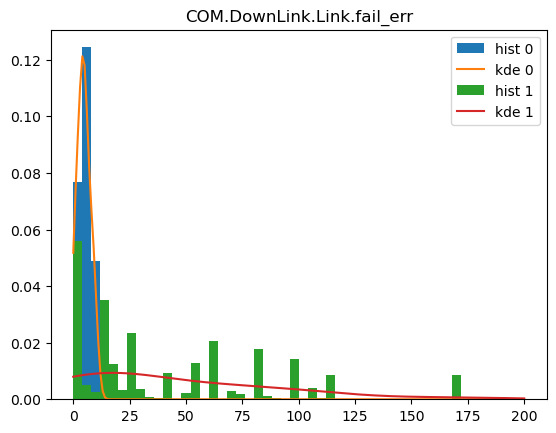

In [37]:
# (weighted) estimated density of the samples leading to failure
x_index = 1
for index in range(2):
    X = X_total2[index*4000:(index+1)*4000,x_index]
    kde = stats.gaussian_kde(X,weights=fg_list2[index])
    plt.hist(X,bins = 50, range = (0,200),weights = fg_list2[index], density = True,label = f"hist {index}")
    plt.plot(np.linspace(0,200,200),kde(np.linspace(0,200,200)),label = f"kde {index}")
plt.title(transition_list[x_index][1])
plt.legend()
plt.show()

In [11]:
Sobol_mIS_try,X_total,fg_list = Sobol_mIS(lbd,[19],draw_lbd,transition_list,step.OBS_NAME,10,200,4000,100,0.05,0.4)

n_IS = 1
10 first estimated failure proba: [0.0004928  0.0003155  0.00039606 0.00026498 0.00034524 0.00039892
 0.0003202  0.00032024 0.00049239 0.00040986]
cv max: 0.9647185024720855
number of cv greater than eps: 200
t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.0005918088524582112
current cv estimation: 0.6606175041996997
t_m = 175.38787392394258
current probability estimation: 0.0015421849795286353
current cv estimation: 0.65540945947911
t_m = 56.884613917273015


In [18]:
for x in fg_list[1]:
    if x!=0:
        print(x)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
def process_all_first_order_Sobol():
    

In [13]:
Sobol_mIS_try,g_try = Sobol_mIS(lbd,[19],draw_lbd,transition_list,step.OBS_NAME,10,200,4000,100,0.05,0.4)

n_IS = 1
10 first estimated failure proba: [1.34772396e-05 1.25202206e-05 1.60728019e-05 1.19783334e-05
 1.09143218e-05 1.36456249e-05 1.54743223e-05 1.33923211e-05
 1.10190552e-05 1.01487959e-05]
cv max: 0.7270652873938308
t_m = 200
less samples leading to failure than the requested quantile
current probability estimation: 0.00112754865542091
current cv estimation: 0.6144821508208387
t_m = 159.37228085840746
current probability estimation: 0.012085221314751593
current cv estimation: 0.684040309752965
t_m = 48.163001416353865
current probability estimation: 0.0001546913728160646
current cv estimation: 0.48767283893889685
t_m = 47.21828692780629
current probability estimation: 0.00017659947629098232
current cv estimation: 0.43642492023520413
t_m = 33.92615292993114
current probability estimation: 0.0016333834036215157
current cv estimation: 0.3533301622801553
t_m = 25.833764687924422
current probability estimation: 0.02667095854011087
current cv estimation: 0.6353637464593707
t_m = 31.8

In [15]:
Sobol_mIS_try

0.10242201519429853

In [23]:
for i in range(len(transition_list)):
    print(lbd_1[i]*np.exp(-lbd_1[i]*1000)/g_try[i](1000))

1.4204595339522268
8.190225067720186e+33
2.3515101382515304
6.555097495427189
1.4517614107473455
0.035152502547140446
1.3140959700214379
3.3183002975758984
1.0568080804913649
1376818.1250141899
2.002762723879516
192.027634070655
1.906608450853771
3.8080265645340856e+52
334.6929567385205
0.3780779247983474
1.5286479052679465
0.029008817597559394
0.009235539674107942
1.4831444439597299e+85
9.258727913962309
5634.987652319729
2.2782648264151324
19426.06304283525
2.2957150488753664
0.2799796567770077
2.249076211285018
963.562920812643
2.1573225464376815
10.452457301933642
1.2099718217603976
0.13951658442866868
1.8807050496850766
10.312840434664576
2.389780374519805
0.06564381421215318
1.0888912399707507
0.39039919732157746


In [37]:
Sobol_mIS_try

0.08349468509300874

In [132]:
np.concatenate((p_f[:2000],p_f[:2000]))

array([0.17480276, 0.15152405, 0.16298218, ..., 0.14857101, 0.14473101,
       0.1734364 ])

In [134]:
p_f2 = np.concatenate((p_f[:2000],p_f[:2000]))
M= 2000
print(((1/M)*np.sum([p_f2[i]*p_f2[i+M]  for i in range(M)])-(1/M)*np.sum([p_f2[i] for i in range(M)])* (1/M)*np.sum([p_f2[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f2[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f2[i+M]  for i in range(M)]))**2))

1.0000000000000453


In [194]:
for index in range(2000):
    print(p_f[index])
    #if p_f[index]!=p_f[index+2000]:
    #    print(p_f[index]-p_f[index+2000])

[2.65682305e-05 7.20039596e-01]
[4.46826303e-05 7.90292126e-01]
[3.80042585e-05 7.93459074e-01]
[4.13433872e-05 8.18246360e-01]
[2.47274885e-05 7.69322899e-01]
[2.85567906e-05 7.66566283e-01]
[3.20708915e-05 7.27278183e-01]
[4.09190691e-05 8.12709290e-01]
[2.36816510e-05 7.46144862e-01]
[1.92378541e-05 6.93626704e-01]
[3.70373459e-05 7.93741354e-01]
[2.63814516e-05 8.20523587e-01]
[3.17788668e-05 8.39707079e-01]
[3.55390325e-05 8.08827439e-01]
[2.13397993e-05 7.37254665e-01]
[3.86394070e-05 7.25834614e-01]
[3.24006929e-05 7.54485559e-01]
[2.65005744e-05 7.51761095e-01]
[3.26639267e-05 8.08518696e-01]
[3.62547257e-05 7.58002632e-01]
[2.97179248e-05 7.45850947e-01]
[3.51053375e-05 7.50066869e-01]
[3.79219764e-05 8.12442554e-01]
[5.34899693e-05 8.32803687e-01]
[4.43339950e-05 8.60365853e-01]
[4.72863883e-05 8.47702257e-01]
[3.80992971e-05 7.83429618e-01]
[3.13936804e-05 8.40760493e-01]
[4.17761310e-05 7.41241233e-01]
[3.83068215e-05 7.48962363e-01]
[4.49612097e-05 8.48138704e-01]
[2.25100